<a href="https://colab.research.google.com/github/Z0rrill0/VisionArtificial/blob/main/EVA3-Rev-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving base_de_datos_ventas.csv to base_de_datos_ventas (1).csv
Datos originales:
             Pais Plataforma      Genero        Ventas       Fecha
0       Argentina       Xbox  Estrategia   5642.331256  2023-01-01
1           Chile     Switch  Estrategia  53369.785841  2023-01-08
2  Estados Unidos       Xbox     Deporte  54293.194600  2023-01-15
3       Argentina         PC      Accion  63924.275199  2023-01-22
4       Argentina     Switch  Estrategia  72746.087705  2023-01-29
Datos después de procesar:
         Ventas  Fecha  Genero_Aventura  Genero_Deporte  Genero_Estrategia  \
0   5642.331256      0            False           False               True   
1  53369.785841      7            False           False               True   
2  54293.194600     14            False            True              False   
3  63924.275199     21            False           False              False   
4  72746.087705     28            False           False               True   

   Plataforma_PS4  P

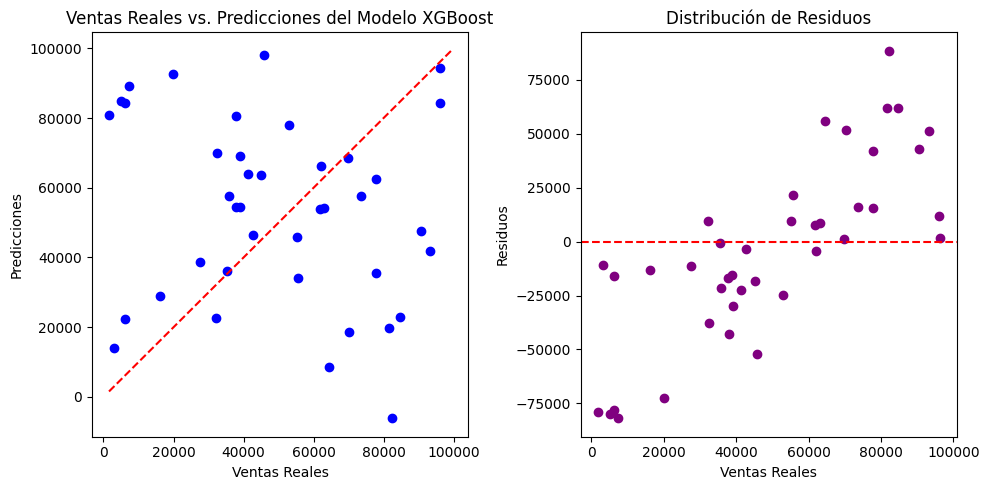

In [6]:
from google.colab import files
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Subir y cargar el archivo
load = files.upload()
data = pd.read_csv('base_de_datos_ventas.csv')  # Cambia el nombre si es necesario

# Mostrar las primeras filas para verificar la carga
print("Datos originales:")
print(data.head())

# Eliminar filas con valores nulos
data.dropna(inplace=True)

# Convertir la columna de fecha a un valor numérico (días desde la fecha mínima)
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Fecha'] = (data['Fecha'] - data['Fecha'].min()).dt.days

# Codificar las variables categóricas con One-Hot Encoding
data = pd.get_dummies(data, columns=['Genero', 'Plataforma', 'Pais'], drop_first=True)

# Verificar el DataFrame procesado
print("Datos después de procesar:")
print(data.head())

# Definir las características (X) y la variable objetivo (y)
X = data.drop('Ventas', axis=1)  # Todas las columnas excepto 'Ventas'
y = data['Ventas']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo XGBoost
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el MAE, MSE y R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print(f'MAE (Error Absoluto Medio): {mae}')
print(f'MSE (Error Cuadrático Medio): {mse}')
print(f'R² (Coeficiente de Determinación): {r2}')

# Visualización de las predicciones vs. valores reales
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea ideal
plt.xlabel('Ventas Reales')
plt.ylabel('Predicciones')
plt.title('Ventas Reales vs. Predicciones del Modelo XGBoost')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Ventas Reales')
plt.ylabel('Residuos')
plt.title('Distribución de Residuos')

plt.tight_layout()
plt.show()
